# 2차 과제

## 16조
2019112127 박세호, 2020112167 민장규, 2020112089 최지안

## 데이터 소개
사용한 dataset : https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format

### Feature 소개
- carID : 고유 ID
- brand : 회사 브랜드
- model : 모델명
- year : 출시년도
- transmission : 변속기
- mileage : 주행거리
- fuelType : 연료 유형
- tax : 세금
- mpg : Miles Per Gallon
- engineSize : 엔진 배기량
- price : 가격

## 개요

### 데이터 전처리

- 중복값 처리
- 결측치 처리
- 범주형 변수 원핫 인코딩

### Linear Regression without sklearn

### Linear Regression with sklearn

### Polynomial Regression

### Modeling nonlinear relationships in the Car Price Dataset

### Model Complexity and Overfitting

### Using regularized methods for regression
- Ridge
- Lasso

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [19]:
data = pd.read_csv('used_car_price_dataset.csv')

In [3]:
data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990


In [20]:
data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2206.717006,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


## 중복값 처리

In [21]:
print("중복된 data 개수 :", len(data[data.duplicated()]))

중복된 data 개수 : 0


## 결측치 처리

In [22]:
data.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [24]:
#carID는 index로 지정
data = data.set_index('carID')

KeyError: "None of ['carID'] are in the columns"

## 범주형 변수 이진화

In [34]:
categorical_features = ['brand', 'model', 'fuelType']

for col in categorical_features:
    print(data[col].value_counts())
    print()

merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: brand, dtype: int64

 Arteon         167
 Grand C-MAX    164
 Scirocco       163
 Prius          154
 Santa Fe       150
               ... 
 Eos              5
 Z3               5
 Getz             4
 CLK              4
 IQ               2
Name: model, Length: 90, dtype: int64

Diesel      2989
Petrol      1754
Hybrid       189
Other         26
Electric       2
Name: fuelType, dtype: int64



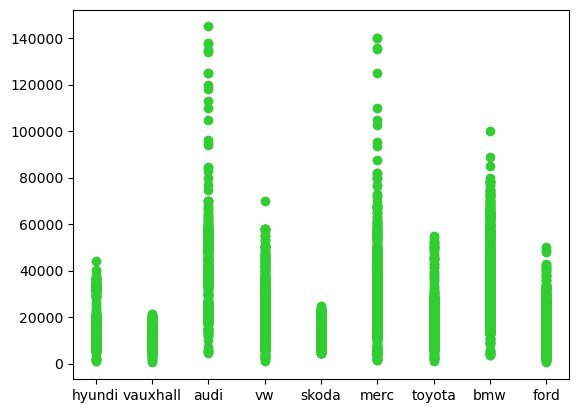

In [25]:
plt.scatter(data['brand'], data['price'], color='limegreen')
plt.show()

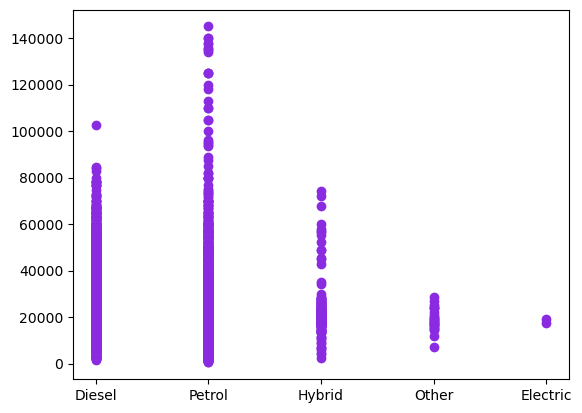

In [26]:
plt.scatter(data['fuelType'], data['price'], color='blueviolet')
plt.show()

In [28]:
# 'brand'와 'fuelType'에 대해 원핫 인코딩 진행
data = pd.concat([data, pd.get_dummies(data['brand'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['fuelType'])], axis=1)
data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,...,merc,skoda,toyota,vauxhall,vw,Diesel,Electric,Hybrid,Other,Petrol
carID,,,,,,,,,,,,,,,,,,,,,
13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995,...,0,0,0,0,0,1,0,0,0,0
17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700,...,0,0,0,1,0,1,0,0,0,0
12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990,...,0,0,0,0,0,0,0,0,0,1
13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999,...,0,0,0,0,1,1,0,0,0,0
16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990,...,0,1,0,0,0,0,0,0,0,1


In [38]:
#categorical feature 삭제
data.drop(categorical_features, axis=1, inplace = True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23704\3717615650.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

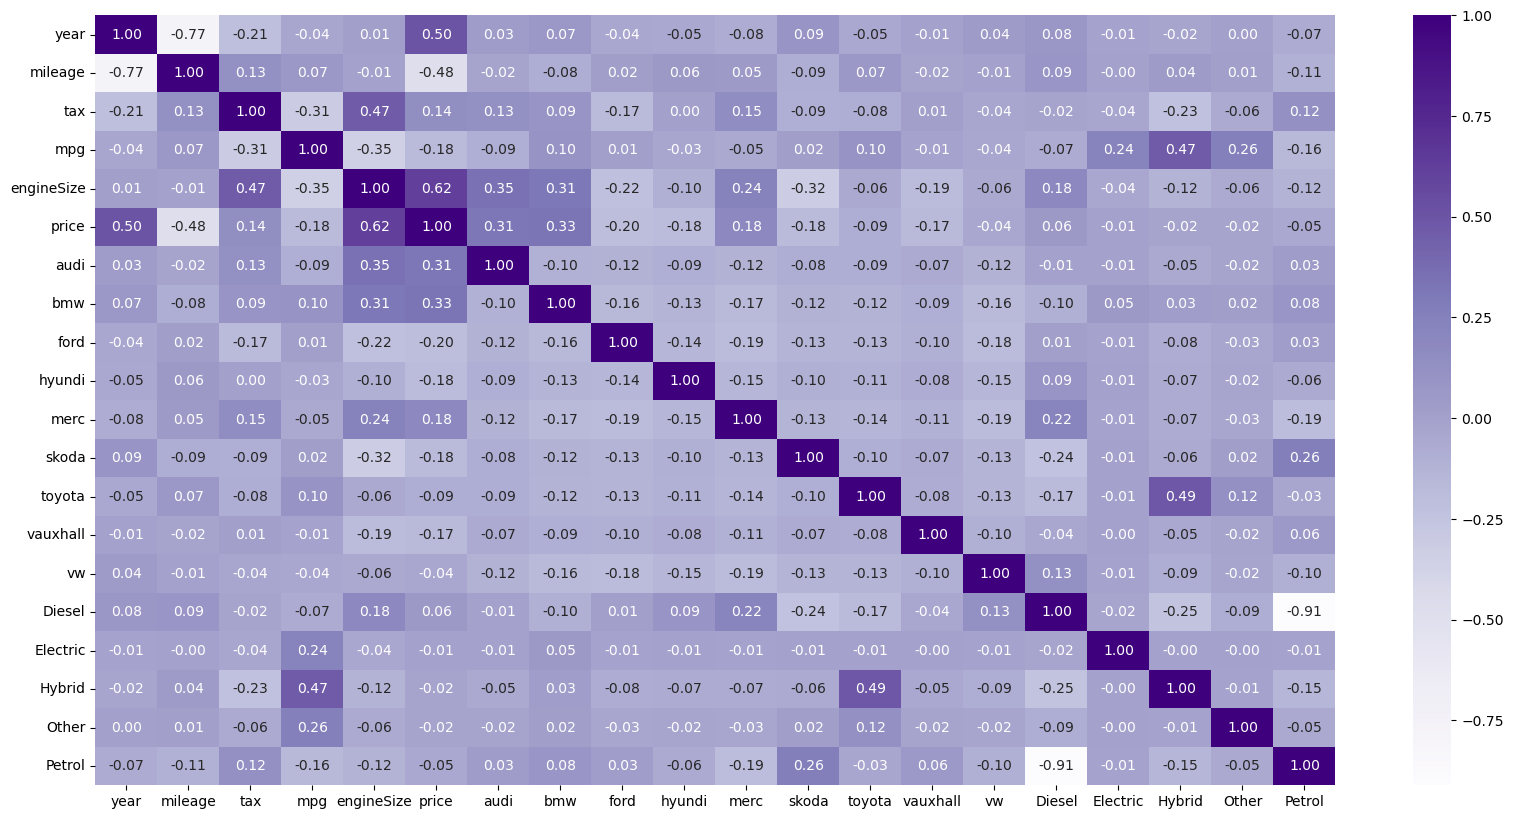

In [39]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f" ,cmap='Purples')

In [40]:
corr = data.corr()
corr = corr.loc['price']
corr = corr[abs(corr)>0.3]
corr = corr.sort_values(ascending=False)
print(corr)

price         1.000000
engineSize    0.624899
year          0.501296
bmw           0.331486
audi          0.313368
mileage      -0.478705
Name: price, dtype: float64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23704\2079412681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [42]:
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print('train data 개수 : {}, test data 개수 : ')

## Linear Regression without sklearn

## Linear Regression with sklearn

# Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Modeling nonlinear relationships in the Car Price Dataset

# Model Complexity and Overfitting

# Using regularized methods for regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Ridge

## Lasso